In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# centralized model

In [4]:
# load the kaggle data and extract the feature and target we want to use
data = pd.read_csv('./data/train.csv')
features = ['LotArea']
targets = 'SalePrice'
X = data[features].values
Y = data[targets].values
# split the data set into training and testing data (if needed)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# convert everything to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1)
# define a simple regression network
model = nn.Linear(1, 1)
# loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
# training
epochs = 60
lossValues = []
percentageLoss = []
for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    percentage = (torch.abs(outputs - Y_train) / Y_train).mean().item() * 100
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    lossValues.append(loss.item())
    percentageLoss.append(percentage)
    print(f"After {epoch+1}/{epoch+1} epochs, The Loss is: {percentage}%")

After 1/1 epochs, The Loss is: 99.99973773956299%
After 2/2 epochs, The Loss is: 97.68496751785278%
After 3/3 epochs, The Loss is: 95.41647434234619%
After 4/4 epochs, The Loss is: 93.19337010383606%
After 5/5 epochs, The Loss is: 91.01472496986389%
After 6/6 epochs, The Loss is: 88.87964487075806%
After 7/7 epochs, The Loss is: 86.78727149963379%
After 8/8 epochs, The Loss is: 84.73673462867737%
After 9/9 epochs, The Loss is: 82.72721767425537%
After 10/10 epochs, The Loss is: 80.75789213180542%
After 11/11 epochs, The Loss is: 78.82794737815857%
After 12/12 epochs, The Loss is: 76.93671584129333%
After 13/13 epochs, The Loss is: 75.09543299674988%
After 14/14 epochs, The Loss is: 73.30065965652466%
After 15/15 epochs, The Loss is: 71.56277298927307%
After 16/16 epochs, The Loss is: 69.860178232193%
After 17/17 epochs, The Loss is: 68.19162368774414%
After 18/18 epochs, The Loss is: 66.5564477443695%
After 19/19 epochs, The Loss is: 64.95397686958313%
After 20/20 epochs, The Loss is: 

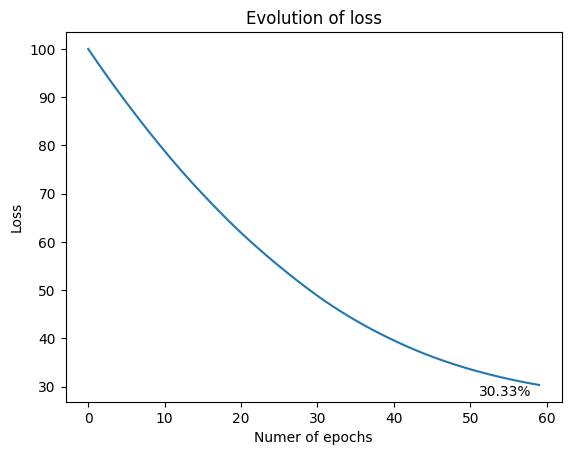

In [5]:
# plot the percentage loss values
plt.plot(percentageLoss)
plt.xlabel('Numer of epochs')
plt.ylabel('Loss')
plt.title('Evolution of loss')
plt.text(epoch-1, percentageLoss[-1], f'{percentageLoss[-1]:.2f}%', ha='right', va='top')
plt.show()